C:\Users\ardui\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp


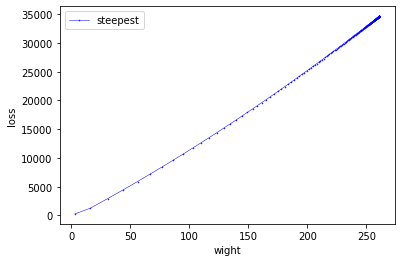

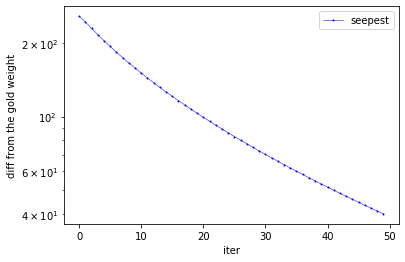

In [16]:
# 最急降下法
import numpy as np
import matplotlib.pyplot as plt

class Steepest:
    def __init__(self, n, w, lamda, iteration, alpha):
        # parameter
        self.n         = n
        self.w         = w
        self.lamda     = lamda
        self.alpha     = alpha
        self.iteration = iteration
        
    def draw(self, w_stack, eval_stack):
            plt.figure(1)
            plt.plot(w_stack, eval_stack, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
            plt.legend()
            plt.xlabel('wight')
            plt.ylabel('loss')
            
            plt.figure(2)
            show_iter = 50
            plt.plot(np.abs(w_stack[:show_iter] - self.w), 'bo-', linewidth=0.5, markersize=1, label='seepest')
            plt.legend()
            plt.yscale('log')
            plt.xlabel('iter')
            plt.ylabel('diff from the gold weight')

    def main(self):
        # noise
        omega = np.random.randn()
        noise = np.random.randn(self.n)
        # 2次元入出力データ
        x = 3 * (np.random.randn(self.n, 4) - 0.5)
        y = (2 * x[:, 0] - 1 * x[:, 1] + 0.5 + 0.5 * np.random.randn(self.n, 1) > 0)
        y = 2 * y - 1
        # 値格納用メモリ
        self.w_stack    = np.zeros(self.iteration)
        self.eval_stack = np.zeros(self.iteration)
        
        # main loop
        for t in range(self.iteration):
            # 事後確率
            posterior = 1 / (1 + np.exp(-y * (self.w * x[:, 0] + x[:, 1])))
            # 勾配方向(**a1) 評価関数をwについて一回微分したもの
            grad = 1 / self.n * np.sum((1 - posterior) * y * x[:, 0]) + 2 * self.lamda * self.w
            # 評価関数の値(p22)
            J = 1 / self.n * np.sum(np.log(1 + np.exp(-y * (self.w + x[:, 0] + x[:, 1])))) + self.lamda * (self.w ** 2)
            # 値の格納
            self.w_stack[t]    = self.w
            self.eval_stack[t] = J
            # step size
            s = 1.0 / np.sqrt(t + 10) 
            # 重み更新
            self.w  = self.w - self.alpha * s * grad
        # draw graph
        self.draw(self.w_stack, self.eval_stack)

# data number, weight, lamda, iteration number, step size
steepest = Steepest(200, 3, 0.1, 300, 1)
steepest.main()

C:\Users\ardui\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in exp


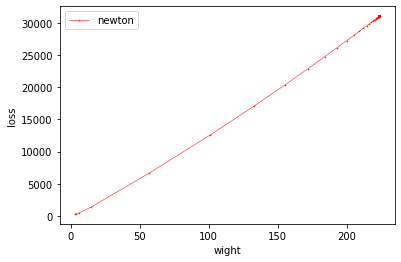

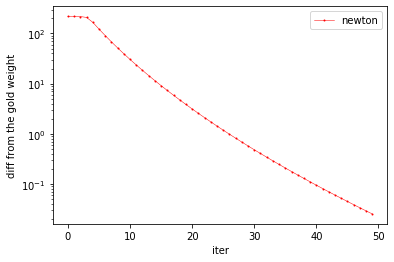

In [20]:
# ニュートン法
import numpy as np
import matplotlib.pyplot as plt

class Newton:
    def __init__(self, n, w, lamda, iteration):
        # parameter
        self.n         = n
        self.w         = w
        self.lamda     = lamda
        self.iteration = iteration
        
    def draw(self, w_stack, eval_stack):
            plt.figure(1)
            plt.plot(w_stack, eval_stack, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
            plt.legend()
            plt.xlabel('wight')
            plt.ylabel('loss')
            
            plt.figure(2)
            show_iter = 50
            plt.plot(np.abs(w_stack[:show_iter] - self.w), 'ro-', linewidth=0.5, markersize=1, label='newton')
            plt.legend()
            plt.yscale('log')
            plt.xlabel('iter')
            plt.ylabel('diff from the gold weight')

    def main(self):
        # noise
        omega = np.random.randn()
        noise = np.random.randn(self.n)
        # 2次元入出力データ
        x = 3 * (np.random.randn(self.n, 4) - 0.5)
        y = (2 * x[:, 0] - 1 * x[:, 1] + 0.5 + 0.5 * np.random.randn(self.n, 1) > 0)
        y = 2 * y - 1
        # 値格納用メモリ
        self.w_stack    = np.zeros(self.iteration)
        self.eval_stack = np.zeros(self.iteration)
        
        # main loop
        for t in range(self.iteration):
            # 事後確率
            posterior = 1 / (1 + np.exp(-y * (self.w * x[:, 0] + x[:, 1])))
            # 勾配方向(**a1) 評価関数をwについて一回微分したもの
            grad = 1 / self.n * np.sum((1 - posterior) * y * x[:, 0]) + 2 * self.lamda * self.w
            # ヘッセ行列(**a1) 評価関数をwについて二回微分したもの
            hess = 1 / self.n * np.sum(posterior * (1 - posterior) * x[:, 0] ** 2) + 2 * self.lamda
            # 評価関数の値(p22)
            J = 1 / self.n * np.sum(np.log(1 + np.exp(-y * (self.w + x[:, 0] + x[:, 1])))) + self.lamda * (self.w ** 2)
            # 値の格納
            self.w_stack[t]    = self.w
            self.eval_stack[t] = J
            # 重み更新のための勾配方向 d (p35)
            d = - grad / hess
            # step size
            s = 1.0 / np.sqrt(t + 10) 
            # 重み更新
            self.w  = self.w + s * d
        # draw graph
        self.draw(self.w_stack, self.eval_stack)
        
# data number, weight, lamda, iteration number, step size
newton = Newton(200, 3, 0.1, 300)
newton.main()

Text(0, 0.5, 'diff from the gold weight')

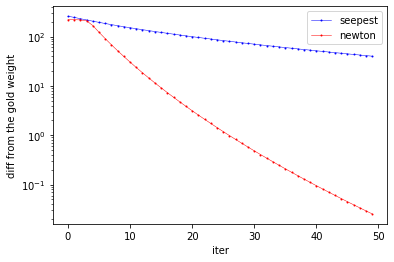

In [22]:
# Compare
plt.figure(1)
show_iter = 50
# 最急降下法
plt.plot(np.abs(steepest.w_stack[:show_iter] - steepest.w), 'bo-', linewidth=0.5, markersize=1, label='seepest')
# ニュートン法
plt.plot(np.abs(newton.w_stack[:show_iter] - newton.w), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('diff from the gold weight')

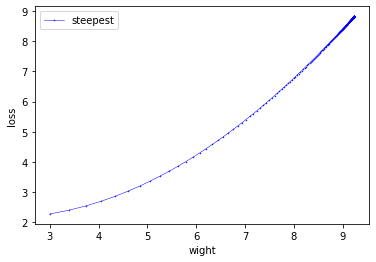

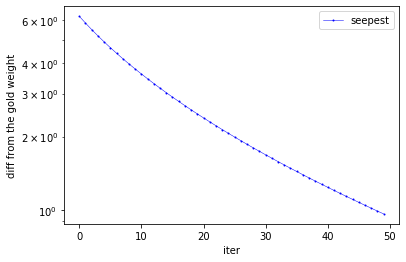

In [54]:
# 最急降下法
import numpy as np
import matplotlib.pyplot as plt

class Steepest:
    def __init__(self, n, w, lamda, iteration, alpha):
        # parameter
        self.n         = n
        self.w         = w
        self.lamda     = lamda
        self.alpha     = alpha
        self.iteration = iteration
        
    def draw(self, w_stack, eval_stack):
            plt.figure(1)
            plt.plot(w_stack, eval_stack, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
            plt.legend()
            plt.xlabel('wight')
            plt.ylabel('loss')
            
            plt.figure(2)
            show_iter = 50
            plt.plot(np.abs(w_stack[:show_iter] - self.w), 'bo-', linewidth=0.5, markersize=1, label='seepest')
            plt.legend()
            plt.yscale('log')
            plt.xlabel('iter')
            plt.ylabel('diff from the gold weight')

    def main(self):
        # noise
        omega = np.random.randn()
        noise = np.random.randn(self.n)
        # 2次元入出力データ
        x = 3 * (np.random.randn(self.n, 4) - 0.5)
        W = np.array([[ 2,  -1, 0.5,], [-3,   2,   1,], [ 1,   2,   3]])
        y = np.argmax(np.dot(np.hstack([x[:,:2], np.ones((self.n, 1))]), W.T)
                      + 0.5 * np.random.randn(self.n, 3), axis=1)
        # 値格納用メモリ
        self.w_stack    = np.zeros(self.iteration)
        self.eval_stack = np.zeros(self.iteration)
        
        # main loop
        for t in range(self.iteration):
            # 事後確率
            posterior = 1 / (1 + np.exp(-y * (self.w * x[:, 0] + x[:, 1])))
            # 勾配方向(**a1) 評価関数をwについて一回微分したもの
            grad = 1 / self.n * np.sum((1 - posterior) * y * x[:, 0]) + 2 * self.lamda * self.w
            # 評価関数の値(p22)
            J = 1 / self.n * np.sum(np.log(1 + np.exp(-y * (self.w + x[:, 0] + x[:, 1])))) + self.lamda * (self.w ** 2)
            # 値の格納
            self.w_stack[t]    = self.w
            self.eval_stack[t] = J
            # step size
            s = 1.0 / np.sqrt(t + 10) 
            # 重み更新
            self.w  = self.w - self.alpha * s * grad
        # draw graph
        self.draw(self.w_stack, self.eval_stack)

# data number, weight, lamda, iteration number, step size
steepest = Steepest(200, 3, 0.1, 300, 1)
steepest.main()

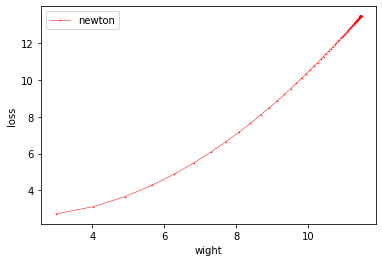

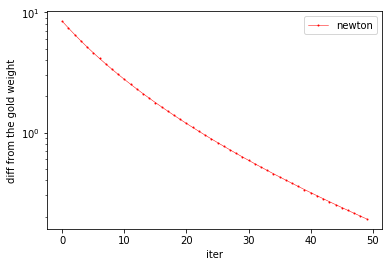

In [55]:
# ニュートン法
import numpy as np
import matplotlib.pyplot as plt

class Newton:
    def __init__(self, n, w, lamda, iteration):
        # parameter
        self.n         = n
        self.w         = w
        self.lamda     = lamda
        self.iteration = iteration
        
    def draw(self, w_stack, eval_stack):
            plt.figure(1)
            plt.plot(w_stack, eval_stack, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
            plt.legend()
            plt.xlabel('wight')
            plt.ylabel('loss')
            
            plt.figure(2)
            show_iter = 50
            plt.plot(np.abs(w_stack[:show_iter] - self.w), 'ro-', linewidth=0.5, markersize=1, label='newton')
            plt.legend()
            plt.yscale('log')
            plt.xlabel('iter')
            plt.ylabel('diff from the gold weight')

    def main(self):
        # noise
        omega = np.random.randn()
        noise = np.random.randn(self.n)
        # 2次元入出力データ
        x = 3 * (np.random.randn(self.n, 4) - 0.5)
        W = np.array([[ 2,  -1, 0.5,], [-3,   2,   1,], [ 1,   2,   3]])
        y = np.argmax(np.dot(np.hstack([x[:,:2], np.ones((self.n, 1))]), W.T)
                      + 0.5 * np.random.randn(self.n, 3), axis=1)
        # 値格納用メモリ
        self.w_stack    = np.zeros(self.iteration)
        self.eval_stack = np.zeros(self.iteration)
        
        # main loop
        for t in range(self.iteration):
            # 事後確率
            posterior = 1 / (1 + np.exp(-y * (self.w * x[:, 0] + x[:, 1])))
            # 勾配方向(**a1) 評価関数をwについて一回微分したもの
            grad = 1 / self.n * np.sum((1 - posterior) * y * x[:, 0]) + 2 * self.lamda * self.w
            # ヘッセ行列(**a1) 評価関数をwについて二回微分したもの
            hess = 1 / self.n * np.sum(posterior * (1 - posterior) * x[:, 0] ** 2) + 2 * self.lamda
            # 評価関数の値(p22)
            J = 1 / self.n * np.sum(np.log(1 + np.exp(-y * (self.w + x[:, 0] + x[:, 1])))) + self.lamda * (self.w ** 2)
            # 値の格納
            self.w_stack[t]    = self.w
            self.eval_stack[t] = J
            # 重み更新のための勾配方向 d (p35)
            d = - grad / hess
            # step size
            s = 1.0 / np.sqrt(t + 10) 
            # 重み更新
            self.w  = self.w + s * d
        # draw graph
        self.draw(self.w_stack, self.eval_stack)
        
# data number, weight, lamda, iteration number, step size
newton = Newton(200, 3, 0.1, 300)
newton.main()

Text(0, 0.5, 'diff from the gold weight')

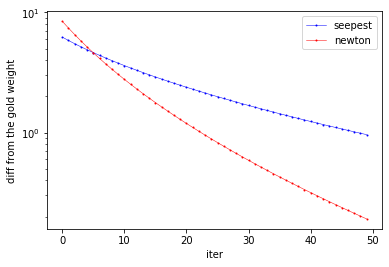

In [56]:
# Compare
plt.figure(1)
show_iter = 50
# 最急降下法
plt.plot(np.abs(steepest.w_stack[:show_iter] - steepest.w), 'bo-', linewidth=0.5, markersize=1, label='seepest')
# ニュートン法
plt.plot(np.abs(newton.w_stack[:show_iter] - newton.w), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('diff from the gold weight')